In [2]:
#read data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data_X, data_Y  = data.iloc[:,1:-1], data.iloc[:,-1:]      #not including ID. Keep data in order for cooresponding Y

print(f"Shape of raw data {data_X.shape}")

# test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv").iloc[:,1:]
# test_X, test_Y  = test_data, pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")['SalePrice']

col_list = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']


print(f"train_X.shape[1] {data.shape[1]}, test_X.shape[1] {data.shape[1]}")

print(f"all_data.shape[1] {data_X.shape[1]}")

#currently, data has NaN
total_nan_count = pd.isna(data_X).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

#fix the NaN
data_X[col_list] = data_X[col_list].fillna('No')
data_X = data_X.fillna(0)

#now, no NaN or blanks
total_nan_count = pd.isna(data_X).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

#data_X.to_csv("data_X.txt", sep="\t", index=False)

#treat the month and year sold as a category 
#source https://www.kaggle.com/code/hobeomlee/prediction-stacked-regressions
data_X['MoSold'] = data_X['MoSold'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data_X['YrSold'] = data_X['YrSold'].astype('str')

#do one-hot encoding
all_data_dummy = pd.get_dummies(data_X).astype(float)
#print(all_data_dummy.describe(include='all'))


train_X_raw, test_X_raw, train_Y, test_Y = train_test_split(all_data_dummy, data_Y, train_size=.7, random_state=0)

#standarize
scaler = StandardScaler()
train_X_stand = scaler.fit_transform(train_X_raw)
test_X_stand  = scaler.transform(test_X_raw)

#normalized data
from sklearn.preprocessing import normalize
train_X_norm = normalize(train_X_raw, axis=0)
test_X_norm = normalize(test_X_raw, axis=0)

#don't use val unless needed
#train_X_norm, val_X_norm, train_Y_norm, val_Y_norm = train_test_split(train_X_norm, train_Y_norm, train_size=.8, random_state=0)

#todo only use the validation set when tuning do not set at top level because linear regression needs all data
#train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, train_size=.8, random_state=0)
#print(clear_data.columns)


assert train_X_norm.shape[1] == train_X_norm.shape[1], print(f"train_X.shape[1] {train_X_norm.shape[1]}, test_X.shape[1] {train_X_norm.shape[1]}")
print(f"train_X_stand.shape {train_X_stand.shape}, test_X_stand.shape {test_X_stand.shape}")

# train_X.to_csv("train_X.txt", sep="\t", index=False)
# test_X.to_csv("test_X.txt", sep="\t", index=False)

total_nan_count = pd.isna(train_X_norm).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")
total_nan_count = pd.isna(test_X_norm).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")
# total_nan_count = pd.isna(val_X).sum().sum()
# print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

# train_X.to_csv("train_X.txt", sep="\t", index=False)
# test_X.to_csv("test_X.txt", sep="\t", index=False)
# val_X.to_csv("val_X.txt", sep="\t", index=False)
#test_X = test_X.fillna('No')


assert train_X_stand.shape[1] == test_X_stand.shape[1], print(f"train_X.shape[1] {train_X_stand.shape[1]}, test_X.shape[1] {test_X_stand.shape[1]}")
assert test_X_stand.shape[0] == test_Y.shape[0] 


Shape of raw data (1460, 79)
train_X.shape[1] 81, test_X.shape[1] 81
all_data.shape[1] 79
Total number of NaN values in the DataFrame: 7829
Total number of NaN values in the DataFrame: 0
train_X_stand.shape (1021, 317), test_X_stand.shape (439, 317)
Total number of NaN values in the DataFrame: 0
Total number of NaN values in the DataFrame: 0


/tmp/ipykernel_161204/2591865301.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#convert to numpy
print(type(train_Y))
train_Y = train_Y.to_numpy()
#val_Y   = val_Y.to_numpy()
test_Y  = test_Y.to_numpy()

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(type(train_Y))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#normalized
lr = LinearRegression().fit(train_X_norm, train_Y)

y_pred = lr.predict(test_X_norm)
rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
print(f"Root Mean Squared Error for normalized data (RMSE): {rmse:.2E}")

#standardized
lr = LinearRegression().fit(train_X_stand, train_Y)
# Make predictions
y_pred = lr.predict(test_X_stand)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
print(f"Root Mean Squared Error for standardized data (RMSE): {rmse:.2E}")

print(type(train_Y))


<class 'numpy.ndarray'>
Root Mean Squared Error for normalized data (RMSE): 1.58E+18
Root Mean Squared Error for standardized data (RMSE): 3.08E+17
<class 'numpy.ndarray'>


In [5]:
#compare to just a average
y_pred = [train_Y.mean()] * len(train_Y)
rmse = np.sqrt(mean_squared_error(train_Y.flatten(), y_pred))
print(f"Baseline RMSE: {rmse:.2f}")

Baseline RMSE: 78129.67


The min RSME is 30836 for 72 number of features


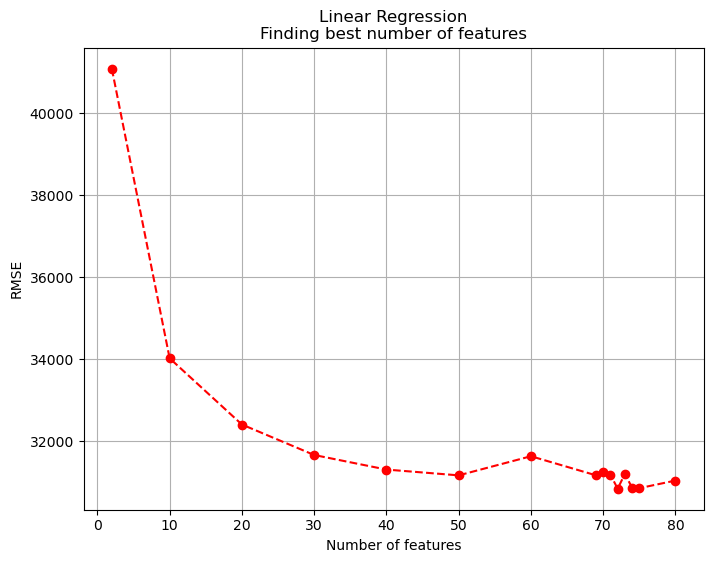

best features 72


In [6]:
#picking features to do linear regression
#source https://machinelearningmastery.com/feature-selection-for-regression-data/

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



def linear_regression_select(x_train, y_train, features):
    # feature selection
    #k is the number of top features

    cv_scores = []

    for k in features:
        feature_selection = SelectKBest(score_func=f_regression, k=k)
        feature_selection.fit(x_train, y_train.flatten())

        train_X_best_features = feature_selection.transform(x_train)
        #test_X_tranformed  = feature_selection.transform(x_val)
        lr = LinearRegression().fit(train_X_best_features, y_train.flatten())

        score = cross_val_score(lr, train_X_best_features, y_train, scoring='neg_root_mean_squared_error', cv=5)

        cv_scores.append(np.mean(score)*-1)    #multiply by negitive 1 because getting negitive RMSE
        #print(f"For train size 100%, number of features: {k}")
        # np.savetxt(f"linear_regression_output/coef_{1}.txt", np.round(model.coef_, 1), delimiter=",")
        # print(f"model y-intercet: {model.intercept_}")
        
        #y_pred = lr.predict(test_X_tranformed)

        #Calculate RMSE
        # rmse = np.sqrt(mean_squared_error(y_val.flatten(), y_pred))
        # if rmse < min_rmse: 
        #     min_features = k
        #     min_rmse = rmse

        # rmse_list.append(rmse)


    min_CV_RSME = min(cv_scores)
    index = cv_scores.index(min_CV_RSME)
    print(f"The min RSME is {min_CV_RSME:.0f} for {features[index]} number of features")

    

    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.plot(features, cv_scores, marker="o", linestyle="--", color="r")
    #plt.yscale('log')
    plt.xlabel("Number of features")
    plt.ylabel("RMSE")
    plt.title("Linear Regression\nFinding best number of features")
    plt.grid(True)
    plt.show()

    return index

features = [2,10,20,30,40, 50, 60, 69, 70, 71, 72, 73,74,75, 80, ]#90, 100, 120, 130, 150, 160, 174, 176, 177, 178, 179, 180, 181, 182, 190, 192, 193] 
best_features_index = linear_regression_select(train_X_stand, train_Y, features)
print(f"best features {features[best_features_index]}")



In [7]:
#using the ideal number of features to perform testing
best_num_features = features[best_features_index]

feature_selection = SelectKBest(score_func=f_regression, k=best_num_features)
feature_selection.fit(train_X_stand, train_Y.flatten())

train_X_best_features = feature_selection.transform(train_X_stand)
test_X_best_features  = feature_selection.transform(test_X_stand)

lr = LinearRegression().fit(train_X_best_features, train_Y.flatten())

y_pred = lr.predict(test_X_best_features)

rmse = np.sqrt(mean_squared_error(test_Y.flatten(), y_pred))

print(f"For testing our linear regression model with {best_num_features} features, the RSME is {rmse:.2f}")


For testing our linear regression model with 72 features, the RSME is 38717.05


below didn't work

In [8]:
#remove constant features 
# using sklearn variancethreshold to find constant features

# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=0.1)
# sel.fit(train_X_stand)  # fit finds the features with zero variance

# # get_support is a boolean vector that indicates which features are retained
# # if we sum over get_support, we get the number of features that are not constant
# print(f"number of features that are not constant {sum(sel.get_support())}")
# print(f"num features {train_X_stand.shape}")
# # # print the constant features
# # print(
# #     len([
# #         x for x in train_X_stand.columns
# #         if x not in train_X_stand.columns[sel.get_support()]
# #     ]))
# mask = sel.get_support()
# false_indices = np.where(~mask)[0]
# print("Indices where the mask is False:", false_indices)

# # we can then drop these columns from the train and test sets
# train_X_trans = sel.transform(train_X_stand)
# test_X_trans = sel.transform(test_X_stand)

# #see how it did
# lr = LinearRegression().fit(train_X_trans, train_Y)
# y_pred = lr.predict(test_X_trans)
# rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
# print(f"RMSE: {rmse:.2E}")

So we see that didn't work since we are already dropping those features value

/home/noel/anaconda3/envs/cs441_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/home/noel/anaconda3/envs/cs441_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/home/noel/anaconda3/envs/cs441_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/home/noel/anaconda3/envs/cs441_project/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


train shape (10, 72), train y (10, 1)
For train size 0.01, number of features: 72
train shape (51, 72), train y (51, 1)
For train size 0.05, number of features: 72
train shape (102, 72), train y (102, 1)
For train size 0.1, number of features: 72
train shape (255, 72), train y (255, 1)
For train size 0.25, number of features: 72
train shape (510, 72), train y (510, 1)
For train size 0.5, number of features: 72
For train size 0.5, number of features: 72


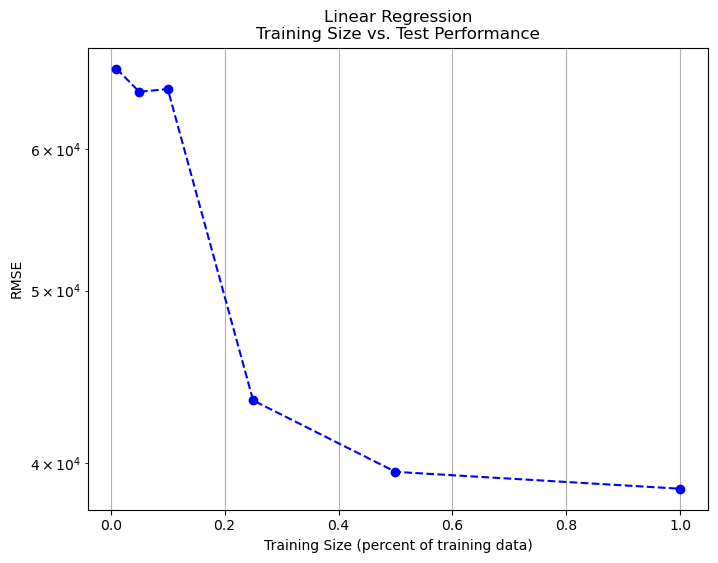

In [110]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

rmse_list = []

# Evaluate models with different training sizes
training_sizes = [0.01, 0.05, 0.1, 0.25, 0.5]
for size in training_sizes:
    best_num_features = features[best_features_index]
    
    X_train_small, _, y_train_small, _  = train_test_split(train_X_stand, train_Y, train_size=size, random_state=0)
    feature_selection = SelectKBest(score_func=f_regression, k=best_num_features)
    feature_selection.fit(X_train_small, y_train_small.flatten())

    train_X_best_features = feature_selection.transform(X_train_small)
    test_X_best_features  = feature_selection.transform(test_X_stand)

    print(f"train shape {train_X_best_features.shape}, train y {y_train_small.shape}")
    lr = LinearRegression().fit(train_X_best_features, y_train_small.flatten())

    y_pred = lr.predict(test_X_best_features)

    print(f"For train size {size}, number of features: {lr.n_features_in_}")
    # np.savetxt(f"linear_regression_output/coef_{size}.txt", np.round(model.coef_, 1), delimiter=",")
    # print(f"model y-intercet: {model.intercept_}")
    y_pred = lr.predict(test_X_best_features)
    rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
    rmse_list.append(rmse)

#100% of data. Do it apart from above since cannot split 100% of data
best_num_features = features[best_features_index]

feature_selection = SelectKBest(score_func=f_regression, k=best_num_features)
feature_selection.fit(train_X_stand, train_Y.flatten())

train_X_best_features = feature_selection.transform(train_X_stand)
test_X_best_features  = feature_selection.transform(test_X_stand)

lr = LinearRegression().fit(train_X_best_features, train_Y.flatten())

y_pred = lr.predict(test_X_best_features)

print(f"For train size {size}, number of features: {lr.n_features_in_}")
# np.savetxt(f"linear_regression_output/coef_{size}.txt", np.round(model.coef_, 1), delimiter=",")
# print(f"model y-intercet: {model.intercept_}")
y_pred = lr.predict(test_X_best_features)
rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
rmse_list.append(rmse)
training_sizes.append(1)        #add the 100% 

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, rmse_list, marker="o", linestyle="--", color="b")
plt.yscale('log')
plt.xlabel("Training Size (percent of training data)")
plt.ylabel("RMSE")
plt.title("Linear Regression\nTraining Size vs. Test Performance")
plt.grid(True)
plt.show()

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import root_mean_squared_error
warnings.filterwarnings('ignore')


def Forest(X_train, Y_train, X_val, Y_val, num):
  forest = RandomForestRegressor(n_estimators=num)
  forest.fit(X_train, Y_train)
  Y_pred = forest.predict(X_val)
  rmse = mean_squared_error(Y_val, Y_pred, squared=False)
  print("number of trees:", forest.n_estimators)
  print("max features:", forest.max_features)
  print("depth:", forest.max_depth)
  return rmse, Y_pred, forest

KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 32, 'p

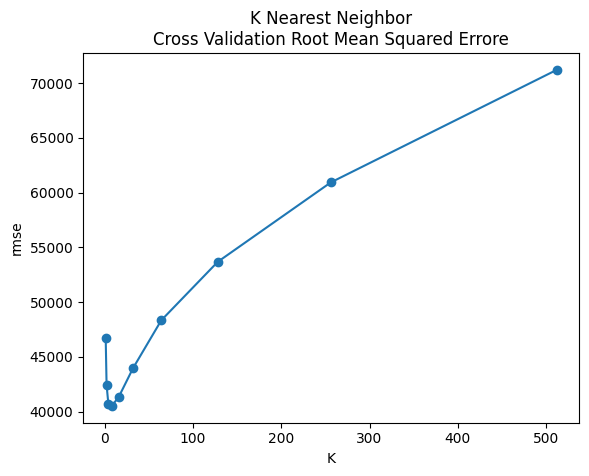

In [143]:
K_set = []
rmse_set = []
# for K in [1]:
scores = []
for K in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
  preds = []
  knn = KNeighborsRegressor(n_neighbors=K)
  knn.fit(train_X_stand, train_Y)
  score = cross_val_score(knn, train_X_stand, train_Y, cv=5, scoring='neg_root_mean_squared_error')
  scores.append(np.mean(score)*-1)
  # Y_pred = knn.predict(train_X_stand)
  print("KNN Model Parameters:", knn.get_params())
  K_set.append(K)
  
print(scores)
plt.plot(K_set, scores, marker='o')
plt.xlabel('K')
plt.ylabel('rmse')
plt.title('K Nearest Neighbor\nCross Validation Root Mean Squared Errore')
plt.show()

KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
K=2,accuracy=-42423.71162625196
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
K=3,accuracy=-41138.14708977206
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
K=4,accuracy=-40721.406389332275
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
K=5,accuracy=-40312.01373913968
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
K=6,accuracy=-40

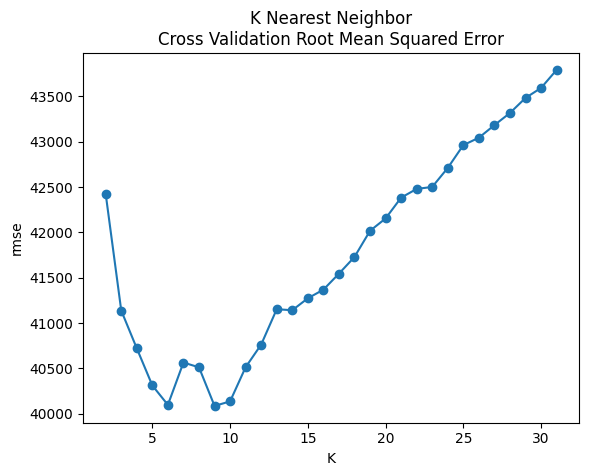

In [136]:
K_set = []
rmse_set = []
# for K in [1]:
scores = []
for K in range(2, 32):
  preds = []
  knn = KNeighborsRegressor(n_neighbors=K)
  knn.fit(train_X_stand, train_Y)
  score = cross_val_score(knn, train_X_stand, train_Y, cv=5, scoring='neg_root_mean_squared_error')
  scores.append(np.mean(score)*-1)
  # Y_pred = knn.predict(train_X_stand)
  print("KNN Model Parameters:", knn.get_params())
  print(f"K={K},accuracy={np.mean(score)}")
  K_set.append(K)
  
print(scores)
print(np.argmin(scores))
plt.plot(K_set, scores, marker='o')
plt.xlabel('K')
plt.ylabel('rmse')
plt.title('K Nearest Neighbor\nCross Validation Root Mean Squared Error')
plt.show()

n_estimators=1,rmse=44221.49814288576
n_estimators=2,rmse=39587.43376716284
n_estimators=4,rmse=33816.66691302977
n_estimators=8,rmse=32627.86800838616
n_estimators=16,rmse=30523.52526483578
n_estimators=32,rmse=30123.859222654584
n_estimators=64,rmse=29826.215622731997
n_estimators=128,rmse=29921.496869006747
n_estimators=256,rmse=29758.63845371455
[44221.49814288576, 39587.43376716284, 33816.66691302977, 32627.86800838616, 30523.52526483578, 30123.859222654584, 29826.215622731997, 29921.496869006747, 29758.63845371455]
8


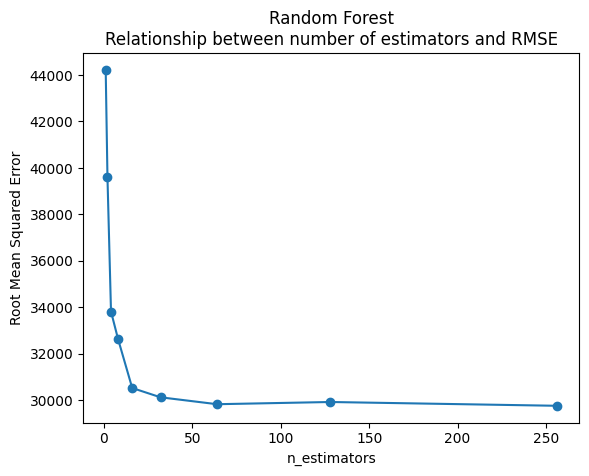

In [144]:
K_set = []
rmse_set = []
scores = []
for n_estimators in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
  preds = []
  knn = RandomForestRegressor(n_estimators=n_estimators)
  knn.fit(train_X_stand, train_Y)
  score = cross_val_score(knn, train_X_stand, train_Y, cv=5, scoring='neg_root_mean_squared_error')
  scores.append(np.mean(score)*-1)
  # Y_pred = knn.predict(train_X_stand)
  print(f"n_estimators={n_estimators},rmse={np.mean(score)*-1}")
  K_set.append(n_estimators)
  
print(scores)
print(np.argmin(scores))
plt.plot(K_set, scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Root Mean Squared Error')
plt.title('Random Forest\nRelationship between number of estimators and RMSE')
plt.show()

max_depth=1,rmse=54084.00310793494
max_depth=2,rmse=43364.5485430894
max_depth=4,rmse=35606.80552494674
max_depth=8,rmse=31064.008298681107
max_depth=16,rmse=30799.627475199337
max_depth=32,rmse=31596.528608938883
max_depth=64,rmse=30455.357281425542
max_depth=128,rmse=31160.441614643845
max_depth=256,rmse=30883.212971857727
[54084.00310793494, 43364.5485430894, 35606.80552494674, 31064.008298681107, 30799.627475199337, 31596.528608938883, 30455.357281425542, 31160.441614643845, 30883.212971857727]
6


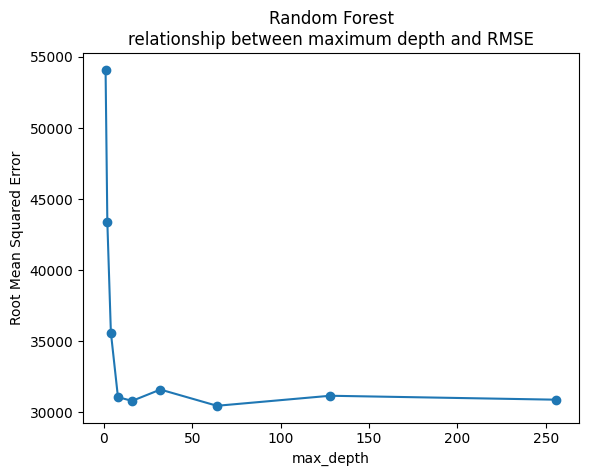

In [145]:
K_set = []
rmse_set = []
scores = []
for max_depth in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
  preds = []
  knn = RandomForestRegressor(n_estimators=16, max_depth=max_depth)
  knn.fit(train_X_stand, train_Y)
  score = cross_val_score(knn, train_X_stand, train_Y, cv=5, scoring='neg_root_mean_squared_error')
  scores.append(np.mean(score)*-1)
  # Y_pred = knn.predict(train_X_stand)
  print(f"max_depth={max_depth},rmse={np.mean(score)*-1}")
  K_set.append(max_depth)
  
print(scores)
print(np.argmin(scores))
plt.plot(K_set, scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.title('Random Forest\nrelationship between maximum depth and RMSE')
plt.show()

size ratio: 0.01
rmse: 110893.50873223983
size ratio: 0.05
rmse: 110105.36514674137
size ratio: 0.1
rmse: 110920.531620701
size ratio: 0.25
rmse: 112113.31285714186
size ratio: 0.5
rmse: 112622.94089708012
size ratio: 1
rmse: 110409.67381222571
[110893.50873223983, 110105.36514674137, 110920.531620701, 112113.31285714186, 112622.94089708012, 110409.67381222571]


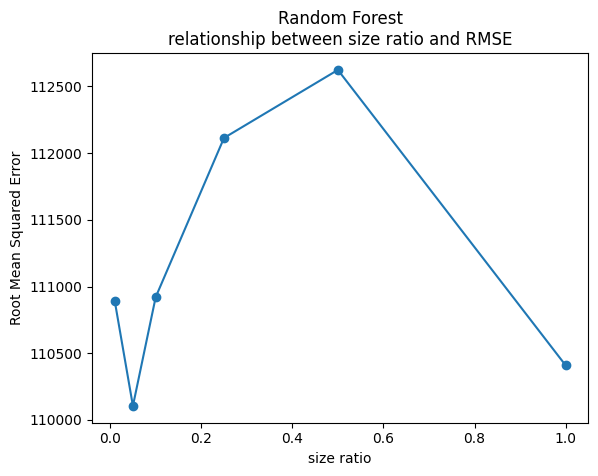

In [155]:
rmses = []
sizeset = [0.01, 0.05, 0.1, 0.25, 0.5]
for size in sizeset:
  print(f"size ratio: {size}")
  size = size*train_X_stand.shape[0]
  size = int(size)
  rf = RandomForestRegressor(n_estimators=16, max_depth=64)
  # rf = RandomForestRegressor(n_estimators=2, max_depth=max_depth)
  rf.fit(train_X_stand[size:], train_Y[size:])
  pred_test = rf.predict(test_X_stand)
  rmse = np.sqrt(np.mean((pred_test-test_Y)**2))
  print(f"rmse: {rmse}")
  rmses.append(rmse)
  
  
print(f"size ratio: {1}")
rf = RandomForestRegressor(n_estimators=16, max_depth=64)
rf.fit(train_X_stand, train_Y)
pred_test = rf.predict(test_X_stand)
rmse = np.sqrt(np.mean((pred_test-test_Y)**2))
rmses.append(rmse)
print(f"rmse: {rmse}")
sizeset.append(1)
print(rmses)
plt.plot(sizeset, rmses, marker='o')
plt.xlabel('size ratio')
plt.ylabel('Root Mean Squared Error')
plt.title('Random Forest\nrelationship between size ratio and RMSE')
plt.show()

size ratio: 0.01
rmse: 44491.88167906422
size ratio: 0.05
rmse: 44343.43385283737
size ratio: 0.1
rmse: 44385.74119841336
size ratio: 0.25
rmse: 43776.10358243226
size ratio: 0.5
rmse: 46460.39419034753
size ratio: 1
rmse: 44451.44428498494
[44491.88167906422, 44343.43385283737, 44385.74119841336, 43776.10358243226, 46460.39419034753, 44451.44428498494]


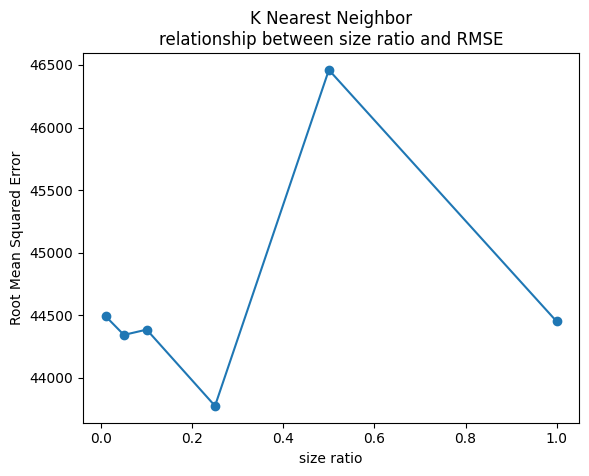

In [158]:
rmses = []
sizeset = [0.01, 0.05, 0.1, 0.25, 0.5]
for size in sizeset:
  print(f"size ratio: {size}")
  size = size*train_X_stand.shape[0]
  size = int(size)
  rf = KNeighborsRegressor(n_neighbors=9)
  # rf = RandomForestRegressor(n_estimators=2, max_depth=max_depth)
  rf.fit(train_X_stand[size:], train_Y[size:])
  pred_test = rf.predict(test_X_stand)
  rmse = np.sqrt(np.mean((pred_test-test_Y)**2))
  print(f"rmse: {rmse}")
  rmses.append(rmse)
  
  
print(f"size ratio: {1}")
rf = KNeighborsRegressor(n_neighbors=9)
rf.fit(train_X_stand, train_Y)
pred_test = rf.predict(test_X_stand)
rmse = np.sqrt(np.mean((pred_test-test_Y)**2))
rmses.append(rmse)
print(f"rmse: {rmse}")
sizeset.append(1)
print(rmses)
plt.plot(sizeset, rmses, marker='o')
plt.xlabel('size ratio')
plt.ylabel('Root Mean Squared Error')
plt.title('K Nearest Neighbor\nrelationship between size ratio and RMSE')
plt.show()